In [50]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os

In [51]:
output_1h_solar = np.genfromtxt('test_results/outputs_solar_1h.csv', delimiter=',')
output_24h_solar = np.genfromtxt('test_results/solar_outputs_24h.csv', delimiter=',')
output_1h_wind = np.genfromtxt('test_results/wind_outputs_1h.csv', delimiter=',')
output_24h_wind = np.genfromtxt('test_results/outputs_wind_24h.csv', delimiter=',')

target_1h_solar = np.genfromtxt('test_results/targets_solar_1h.csv', delimiter=',')
target_24h_solar = np.genfromtxt('test_results/solar_targets_24h.csv', delimiter=',')
target_1h_wind = np.genfromtxt('test_results/wind_targets_1h.csv', delimiter=',')
target_24h_wind = np.genfromtxt('test_results/targets_wind_24h.csv', delimiter=',')

In [52]:
wind_unnorm = np.genfromtxt('data/test_data/test_wind_unnorm.csv', delimiter=',',skip_header=1)
#get first column of wind_unnorm
wind_unnorm = wind_unnorm[:,0]
wind_max = np.max(wind_unnorm)
wind_min = np.min(wind_unnorm)
solar_unnorm = np.genfromtxt('data/test_data/test_solar_unnorm.csv', delimiter=',',skip_header=1)
#get first column of solar_unnorm
solar_unnorm = solar_unnorm[:,0]
solar_max = np.max(solar_unnorm)
solar_min = np.min(solar_unnorm)
print('wind max: ', wind_max, 'wind min: ', wind_min)
print('solar max: ', solar_max, 'solar min: ', solar_min)

wind max:  44258.72924292396 wind min:  1390.3407180420559
solar max:  19947.582780965735 solar min:  0.0


In [53]:
# invert normalization of data to range [-1, 1]
def invert_minmax_scaling(predictions, target_min, target_max):
    return ((predictions + 1) / 2) * (target_max - target_min) + target_min

In [54]:
#unnormalize the data
output_1h_solar = invert_minmax_scaling(output_1h_solar, solar_min, solar_max)
output_24h_solar = invert_minmax_scaling(output_24h_solar, solar_min, solar_max)
output_1h_wind = invert_minmax_scaling(output_1h_wind, wind_min, wind_max)
output_24h_wind = invert_minmax_scaling(output_24h_wind, wind_min, wind_max)
target_1h_solar = invert_minmax_scaling(target_1h_solar, solar_min, solar_max)
target_24h_solar = invert_minmax_scaling(target_24h_solar, solar_min, solar_max)
target_1h_wind = invert_minmax_scaling(target_1h_wind, wind_min, wind_max)
target_24h_wind = invert_minmax_scaling(target_24h_wind, wind_min, wind_max)

In [55]:
print('output_1h_solar: ', output_1h_solar[:10])
print('target_1h_solar: ', target_1h_solar[:10])

output_1h_solar:  [649.91757527 756.47293993 688.00142804 559.37523952 456.83858869
 386.80952795 355.89158885 361.66997617 414.21882076 586.09968643]
target_1h_solar:  [1061.21093882  966.3264898   880.73085786  803.38131754  733.37246927
  669.91721585  612.37173078  592.27935065  721.88762722 1015.75191391]


In [56]:
def plot_day(output_1h, output_24h, target, subject): 
    hours_per_day = 24

    # Adjust start hour for plotting from hour 24 to align all datasets
    # Reducing the maximum index calculation by 24 hours to accommodate the offset for synced data
    max_day_index = len(output_24h) - hours_per_day  # Use outputs_solar_24 length to define the day's limits

    # Select a random start hour from 24 to the maximum possible index that still allows for a full day of data
    start_hour = np.random.randint(24, max_day_index + 1)

    # Calculate the corresponding day number (for title purposes)
    day_number = (start_hour - 24) // hours_per_day + 1

    # Plot actual vs. predicted solar energy outputs for the selected day, starting from the 24th hour
    plt.figure(figsize=(12, 6))
    plt.plot(range(hours_per_day), target[start_hour:start_hour + hours_per_day], "-o", color="b", label="Actual", markersize=4)
    plt.plot(range(hours_per_day), output_1h[start_hour:start_hour + hours_per_day], "-o", color="g", label="Predictions (1h ahead)", markersize=4)
    plt.plot(range(hours_per_day), output_24h[start_hour - 24:start_hour - 24 + hours_per_day], "-o", color="purple", label="Predictions (24hr ahead)", markersize=4)

    plt.legend()
    plt.title(f"{subject} Energy Supply: Day {day_number} of 2022")
    plt.xlabel("Hour of the Day")
    #make y ticks full number not exponential
    plt.ticklabel_format(axis="y", style="plain")
    plt.ylabel(f"{subject} Supply MW")
    plt.grid(True)
    plt.savefig(f"plots/testing/{subject}_energy_supply_day_{day_number}.png")
    plt.show()

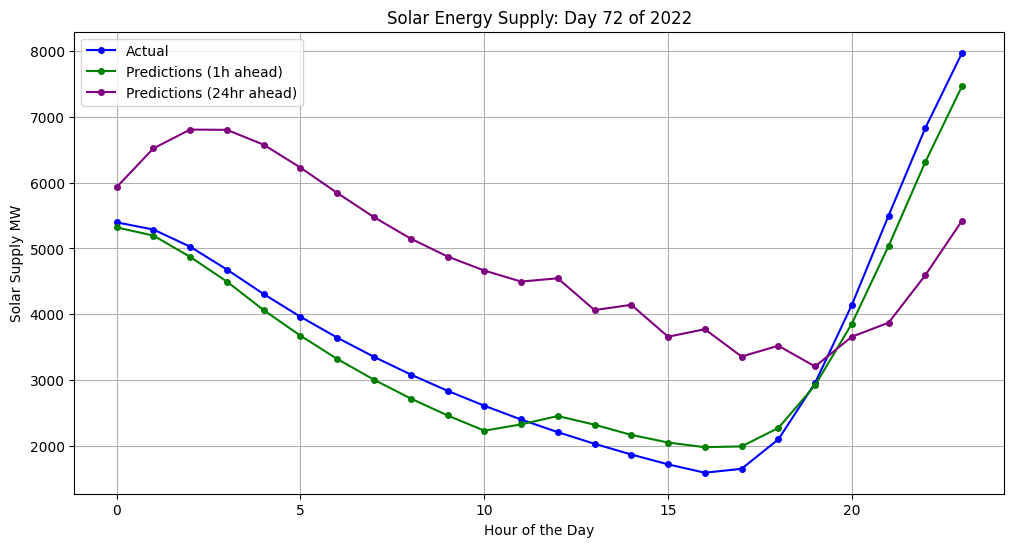

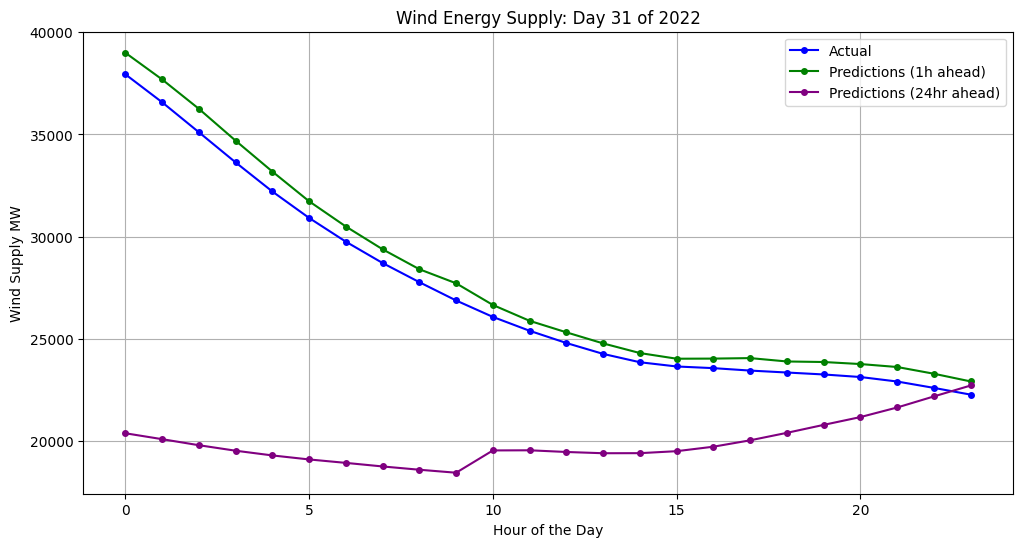

In [57]:
plot_day(output_1h_solar, output_24h_solar, target_1h_solar, "Solar")
plot_day(output_1h_wind, output_24h_wind, target_1h_wind, "Wind")


In [58]:
def plot_week(output_1h, output_24h, target, subject):
    # Number of hours per week
    hours_per_week = 7 * 24

    # Adjust start hour for plotting from hour 24 to align all datasets
    # Reducing the maximum index calculation by 24 hours to accommodate the offset for synced data
    max_week_index = len(output_24h) - hours_per_week  # Use outputs_solar_24 length to define the week's limits

    # Select a random start hour from 24 to the maximum possible index that still allows for a full week of data
    start_hour = np.random.randint(24, max_week_index + 1)

    # Calculate the corresponding week number (for title purposes)
    week_number = (start_hour - 24) // hours_per_week + 1

    # Plot actual vs. predicted solar energy outputs for the selected week, starting from the 24th hour
    plt.figure(figsize=(12, 6))
    plt.plot(range(hours_per_week), target[start_hour:start_hour + hours_per_week], "-o", color="b", label="Actual", markersize=2)
    plt.plot(range(hours_per_week), output_1h[start_hour:start_hour + hours_per_week], "-o", color="g", label="Predictions (1h ahead)", markersize=2)
    plt.plot(range(hours_per_week), output_24h[start_hour - 24:start_hour - 24 + hours_per_week], "-o", color="purple", label="Predictions (24h ahead)", markersize=2)

    plt.legend()
    plt.title(f"{subject} Energy Supply: Week {week_number} of 2022")
    plt.xlabel("Hour of the Week")
    plt.ylabel(f"{subject} Supply MW")
    plt.grid(True)
    plt.savefig(f"plots/testing/{subject}_energy_supply_week_{week_number}_window.png")
    plt.show()

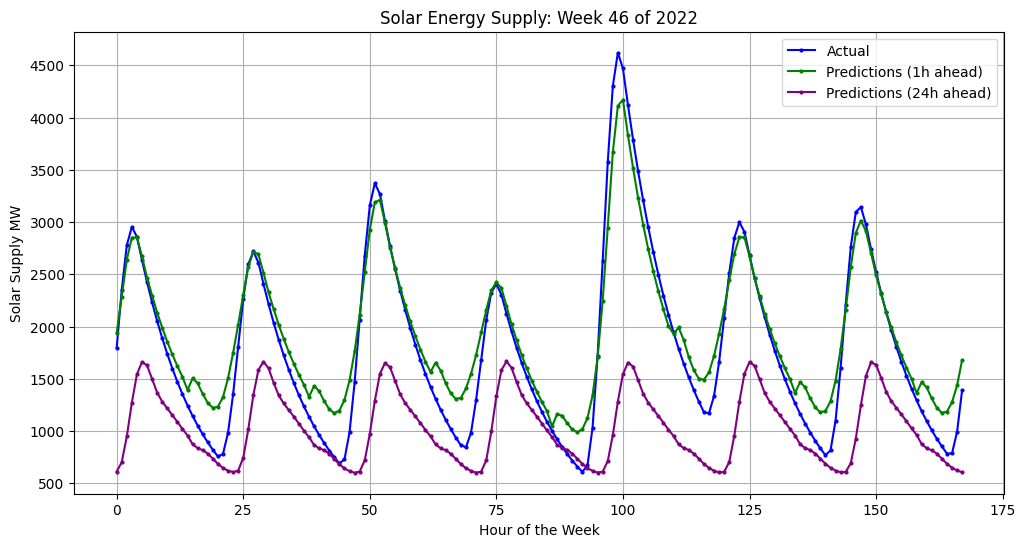

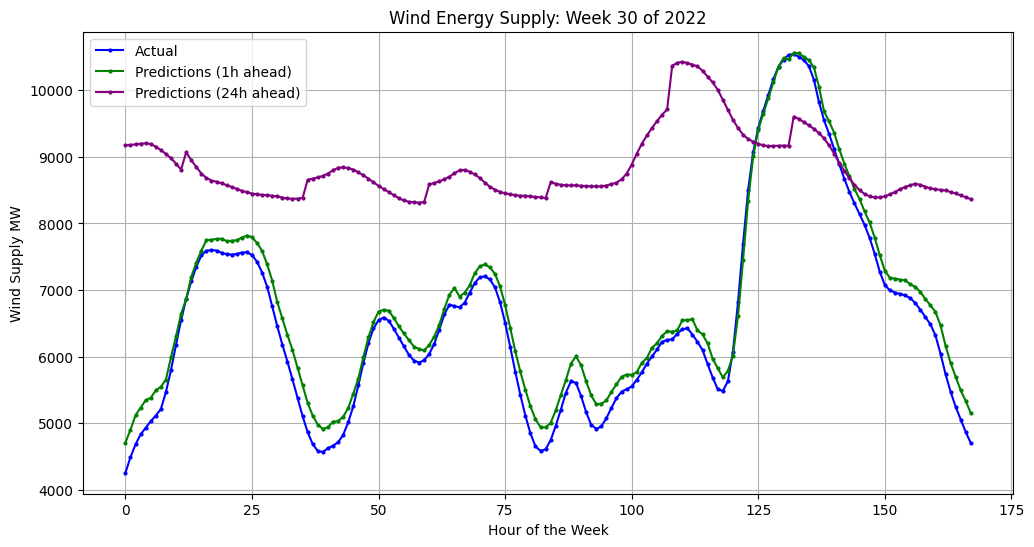

In [64]:
plot_week(output_1h_solar, output_24h_solar, target_1h_solar, "Solar")
plot_week(output_1h_wind, output_24h_wind, target_1h_wind, "Wind")

In [60]:
def plot_total(output_1h, output_24h, target, subject):
    # Plotting the actual vs. predicted solar energy outputs for the entire test dataset
    plt.figure(figsize=(12, 6))
    plt.plot(target, "-o", color="b", label="Actual", markersize=1, linewidth=1)
    plt.plot(output_1h, "-o", color="g", label="Predictions (1h ahead)", markersize=1, linewidth=1)
    plt.plot(output_24h, "-o", color="purple", label="Predictions (24h ahead)", markersize=1, linewidth=1)

    plt.legend()
    plt.title(f"{subject} Energy Supply: Actual vs. Predicted")
    plt.xlabel("Time (in hours)")
    plt.ylabel(f"{subject} Supply MW")
    plt.grid(True)
    plt.savefig(f"plots/testing/{subject}_predictions_total.png")
    plt.show()
    

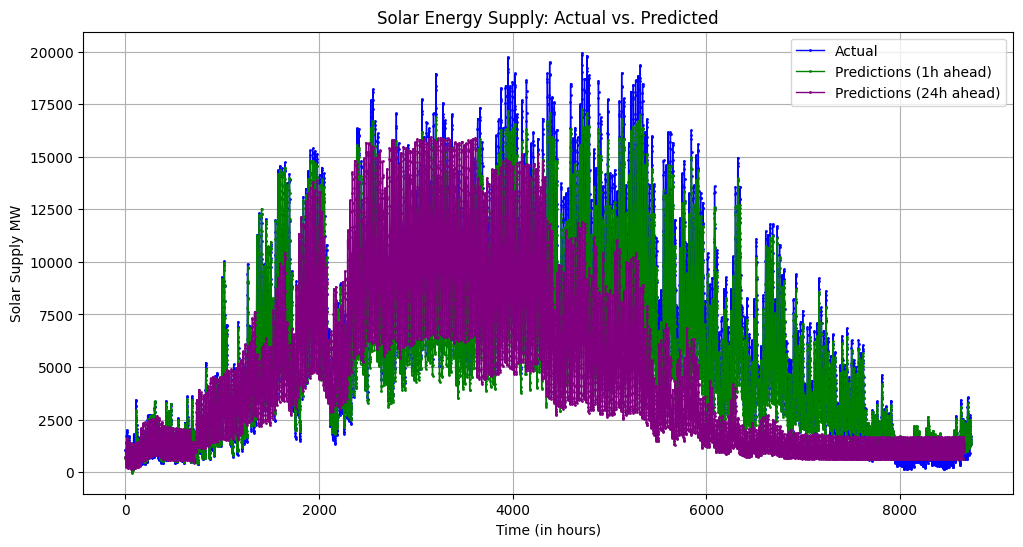

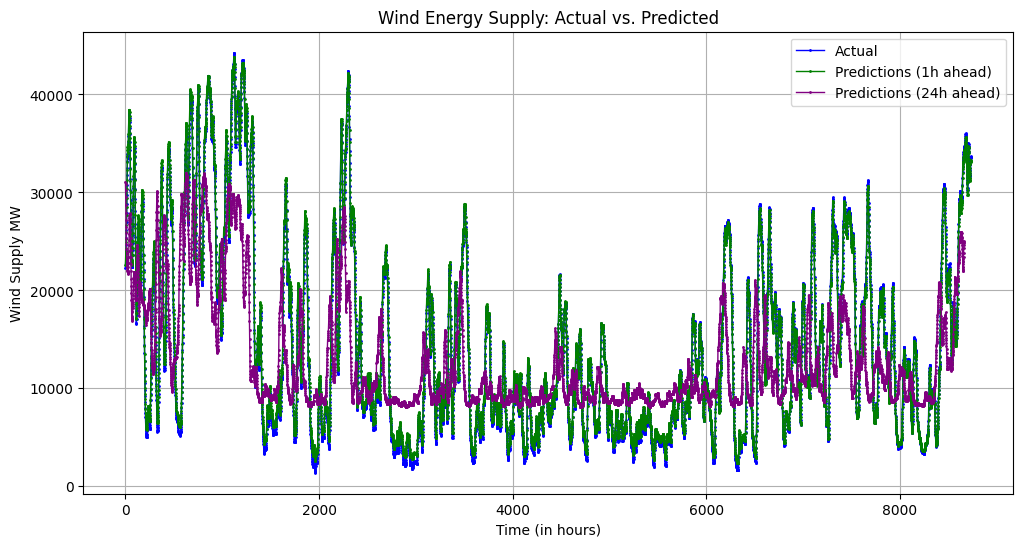

In [61]:
plot_total(output_1h_solar, output_24h_solar, target_1h_solar, "Solar")
plot_total(output_1h_wind, output_24h_wind, target_1h_wind, "Wind")